# **DSCI 100 Group Project**

## 1. Introduction

### (1)Background information



### (2)Question we tried to answer
#### **Broad Question**
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

#### **Specific Question**
Can player characteristics (experience, gender, age) and behavior (played_hours) predict whether a player subscribes to a game-related newsletter in the Minecraft server dataset?

### (3)Describe the dataset
#### Game player data set
This data was taken from [a research group in Computer Science at UBC](https://plai.cs.ubc.ca/). This dataset contains information about players and their game sessions collected from a research game server. The goal is to analyze the factors that influence players' likelihood of subscribing to the game newsletter.

**players.csv**: This data is a list of all unique players, including data about each player. According to the website, the file contains the following information:

* experience(character) = The player's experience level.
* subscribe(logical) = Subscription to the game newsletter (TRUE / FALSE)
* hashedEmail(character) = Player's Hashed email
* played_hours(numeric) = Total play time (hours)
* name(character) = Player's name
* gender(character) = Player's gender
* Age(numeric) = Player's age
  
**sessions.csv**: A list of individual play sessions by each player, including data about the session. According to the website, the file contains the following information:

* hashedEmail(character) = Player's Hashed email
* start_time(character) = Session start time (Format: DD/MM/YYYY HH:MM)
* end_time(character) = Session end time (Format: DD/MM/YYYY HH:MM)
* original_start_time(numeric) = Unix timestamp of session start
* original_end_time(numeric) = Unix timestamp of session end

## 2. Methods & Results

### (1) We will use the k-Nearest Neighbors (k-NN) classification method. 
This method calculates the distance between a new data point and its k nearest neighbors and assigns the majority class as the prediction result. The steps are as follows:
* The data will be cleaned by:
    * Converting `subscribe` into a factor variable for classification models.
    * Converting `experience` and `gender` into numeric variable for classification models
    * Handling missing values
    * Scale the `played_hours` and `Age` for k-NN classification.
    * Removing players whose `played_hours` is 0, as they do not contribute meaningful game behavior data.
    * Drop hashedEmail and name as they’re not relevant for prediction.
* Visualize the clean data, find the relationship between each variable with subscribe
* Split the data into training and testing by 70/30.
* Use cross-validation to find the best k for this k-nn classification.
* Calculate accuracy.
* Predict the test data using the model that we built


### (2) Execution

In [1]:
# Load necessary R packages
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
#Read csv files
players_url <- "https://raw.githubusercontent.com/Harry672-ai/group_project_individual/refs/heads/main/players.csv"
sessions_url<- "https://raw.githubusercontent.com/Harry672-ai/group_project_individual/refs/heads/main/sessions.csv"
players <- read_csv(players_url)
sessions <- read_csv(sessions_url)
players
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


**Wrangles and cleans the data**

In [3]:
#Convert subscribe to factor
players <- players |>
mutate(subscribe = as.factor(subscribe))
#Convert experience and gender to numeric
players <- players|>
  mutate(gender = recode(gender,
                             "Agender" = 0,
                             "Male" = 1,
                             "Female" = 2,
                             "Non-binary" = 3,
                             "prefer not to say" = 4,
                             "Two-Spirited" = 5))|>
mutate(gender = as.numeric(gender))

players <- players|>
  mutate(experience = recode(experience,
                             "Amateur" = 0,
                             "Veteran" = 1,
                             "Pro" = 2,
                             ))|>
mutate(experience = as.numeric(experience))
#Handle missing values in age
players <- players |>
drop_na()|>
#Remove players with played_hours == 0
filter(played_hours > 0)|>
#select the variable we want
select(experience, subscribe, played_hours, gender, Age)
players

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `gender = recode(...)`.
Caused by warning:
! Unreplaced values treated as NA as `.x` is not compatible.
Please specify replacements exhaustively or supply `.default`.”
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `experience = recode(experience, Amateur = 0, Veteran = 1, Pro =
  2, )`.
Caused by warning:
! Unreplaced values treated as NA as `.x` is not compatible.
Please specify replacements exhaustively or supply `.default`.”


experience,subscribe,played_hours,gender,Age
<dbl>,<fct>,<dbl>,<dbl>,<dbl>
2,TRUE,30.3,1,9
1,TRUE,3.8,1,17
0,TRUE,0.7,2,21
⋮,⋮,⋮,⋮,⋮
1,TRUE,0.1,2,44
1,FALSE,0.3,1,22
0,FALSE,2.3,1,17


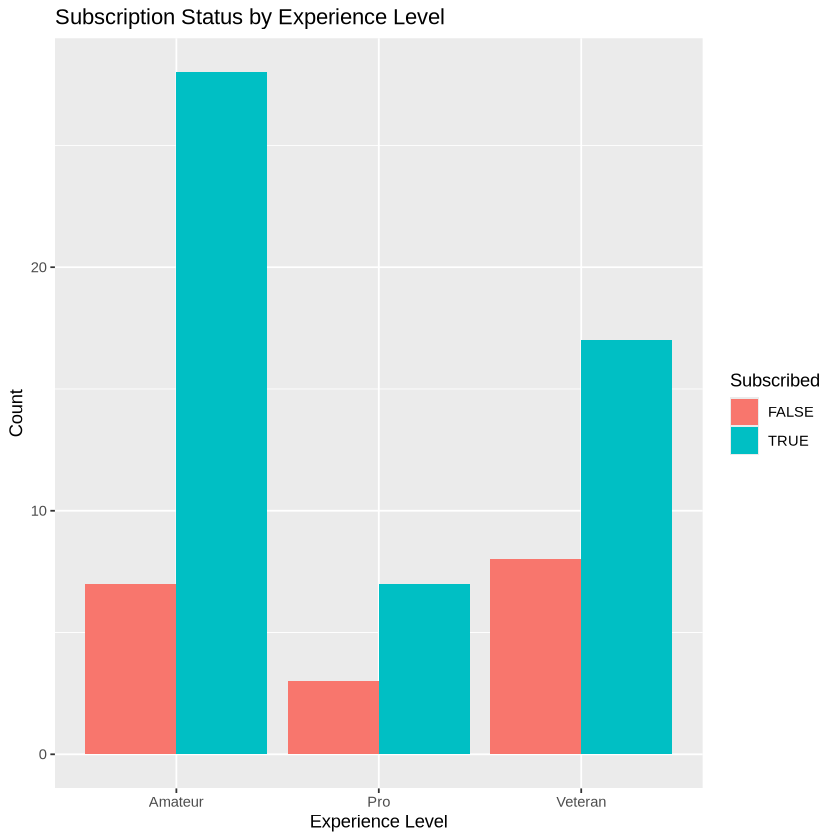

In [4]:
#Visualization 1: Bar plot of subscription status by experience level
players_experience_characters <- players|>
  mutate(experience = recode(experience,
                             `0` = "Amateur",
                             `1` = "Veteran",
                             `2` = "Pro",
                             ))|>
mutate(experience = as.character(experience))
plot_experience<-ggplot(players_experience_characters, aes(x = experience, fill = subscribe)) +
  geom_bar(position = "dodge") +  # Side-by-side bar plot for subscription counts
  labs(
    title = "Subscription Status by Experience Level",
    x = "Experience Level",
    y = "Count",
    fill = "Subscribed"
  )
plot_experience

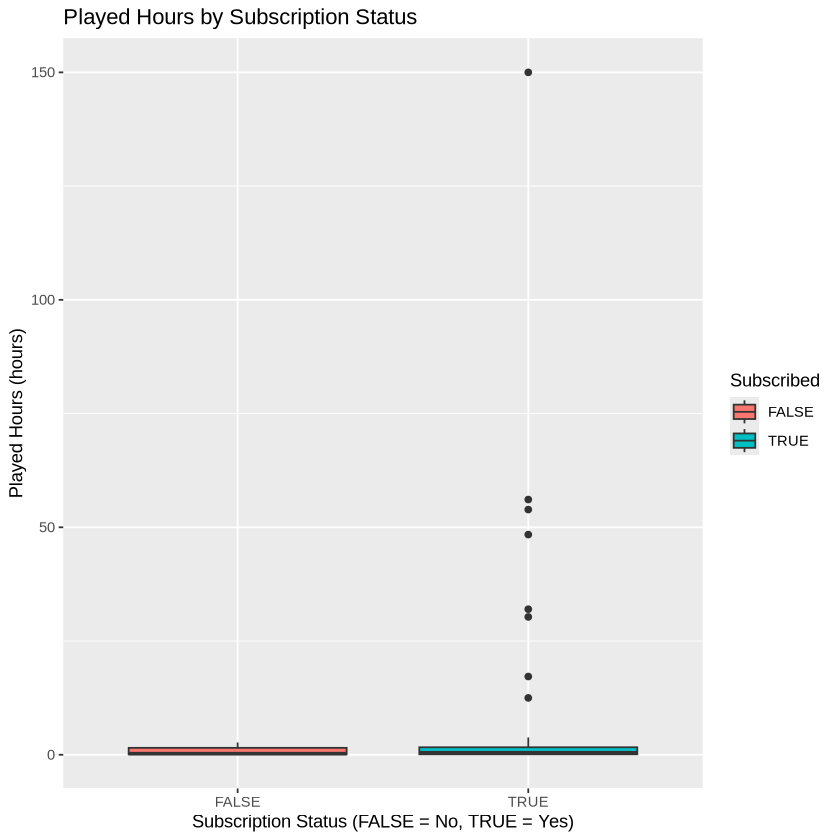

In [5]:
#Visualization 2: scatter plot of subscription status by played hours
plot_hours <- ggplot(players, aes(x = subscribe, y = played_hours, fill = subscribe)) +
  geom_boxplot() +
  labs(
    title = "Played Hours by Subscription Status",
    x = "Subscription Status (FALSE = No, TRUE = Yes)",
    y = "Played Hours (hours)",
    fill = "Subscribed"
  )
plot_hours

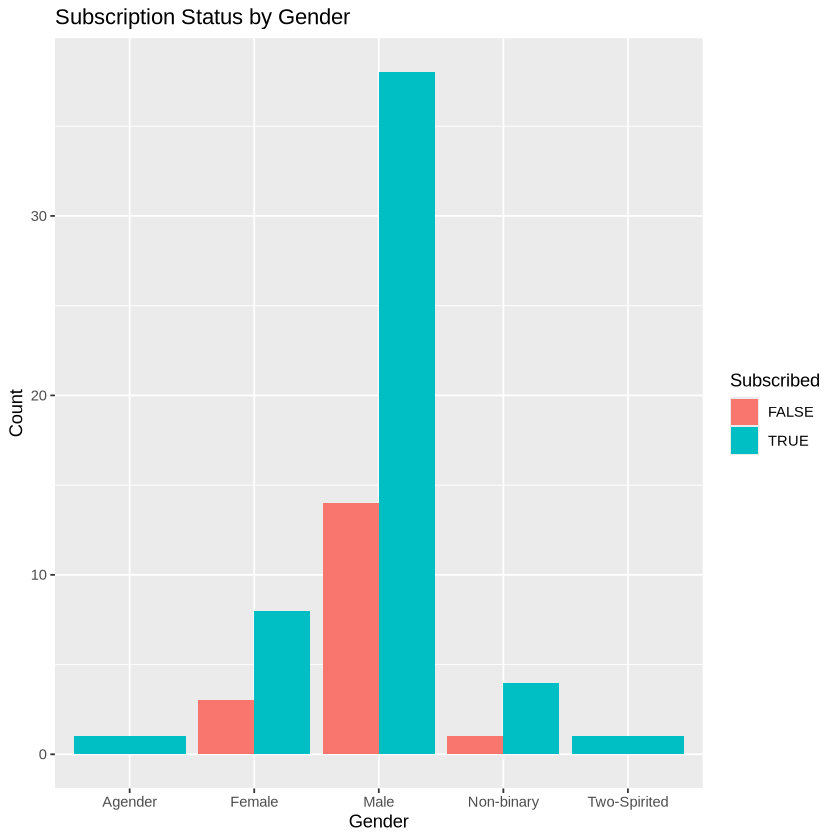

In [6]:
#Visualization 3: Bar plot of subscription status by gender. First we want to have a clear We want to clearly see the actual gender labels on the plot instead of numbers, 
#so we first convert the gender column— which was previously turned into numeric— back to character.
players_gender_characters <- players|>
  mutate(gender = recode(gender,
                             `0` = "Agender",
                             `1` = "Male",
                             `2` = "Female",
                             `3` = "Non-binary",
                             `4` = "prefer not to say",
                             `5` = "Two-Spirited"))|>
mutate(gender = as.character(gender))
plot_Gender<-ggplot(players_gender_characters, aes(x = gender, fill = subscribe)) +
  geom_bar(position = "dodge") +  
  labs(
    title = "Subscription Status by Gender",
    x = "Gender",
    y = "Count",
    fill = "Subscribed"
  )
plot_Gender

Warning message:
“Removed 12 rows containing missing values or values outside the scale range
(`geom_bar()`).”


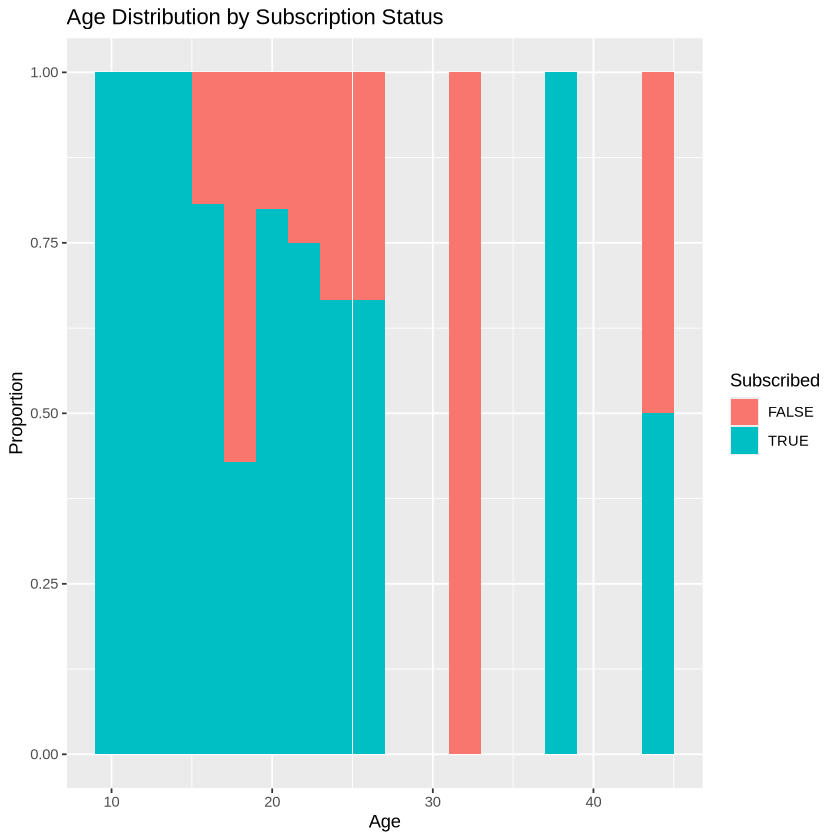

In [7]:
#Visualization 4: histogram of subscription status by Age
plot_age <-ggplot(players, aes(x = Age, fill = subscribe)) +
  geom_histogram(binwidth = 2, position = "fill") +
  labs(
    title = "Age Distribution by Subscription Status",
    x = "Age",
    y = "Proportion",
    fill = "Subscribed") 
plot_age

In [19]:
set.seed(2026)
#Performs the data analysis
players_split <- initial_split(players, prop = 0.7, strata = subscribe)
players_train <- training(players_split)
players_test <- testing(players_split)
#Create the recipe
recipe <- recipe(subscribe~., data = players_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())
#Create the model
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

In [20]:
#Make the tibble of Value of K that we want to try
k_vals <- tibble(neighbors = seq(from = 1, to = 35, by = 1))

In [21]:
set.seed(2026)
#Split the data
vfold <- vfold_cv(players_train, v = 5, strata = subscribe)
#Fit the knn model
fit <- workflow() |>
    add_recipe(recipe) |>
    add_model(knn_spec) |>
    tune_grid(resample = vfold, grid = k_vals)
#Collect the metrics
metrics <- collect_metrics(fit)
#Finding the best K
best_k <- metrics |>
        filter(.metric == "accuracy") |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

→ A | warning: 35 samples were requested but there were 37 rows in the data. 32 will be used.

There were issues with some computations   A: x1

→ B | warning: 35 samples were requested but there were 38 rows in the data. 33 will be used.

There were issues with some computations   A: x1
→ C | warning: 35 samples were requested but there were 39 rows in the data. 34 will be used.

There were issues with some computations   A: x1
There were issues with some computations   A: x1   B: x1   C: x1

There were issues with some computations   A: x1   B: x1   C: x3





[1] 10

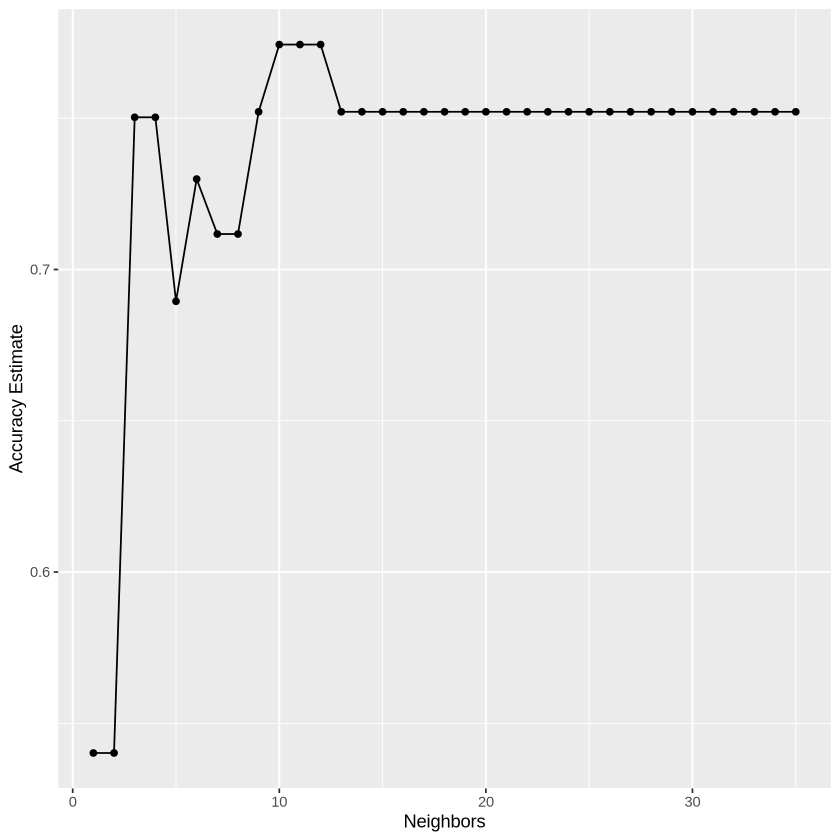

In [22]:
set.seed(2026)
#Plot the accuracy versus K to prove the best K
cross_val_plot <- metrics |>
    filter(.metric == "accuracy") |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") 
cross_val_plot

In [23]:
#Create the model for the best K
knn_spec_best_K <- nearest_neighbor(weight_func = "rectangular", neighbors = 10) |>
    set_engine("kknn") |>
    set_mode("classification")
#Fit the knn model for the best K
fit_best_K <- workflow() |>
    add_recipe(recipe) |>
    add_model(knn_spec_best_K) |>
    fit(data = players_train)
#Predict the testing data
players_predictions <- predict(fit_best_K, players_test)
#Merge the prediction with testing data to compare the prediction
players_predictions <- bind_cols(players_predictions, players_test)
players_predictions

.pred_class,experience,subscribe,played_hours,gender,Age
<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
TRUE,2,TRUE,30.3,1,9
TRUE,0,TRUE,0.2,1,22
TRUE,0,TRUE,0.2,1,17
⋮,⋮,⋮,⋮,⋮,⋮
TRUE,1,TRUE,0.1,2,44
TRUE,1,FALSE,0.3,1,22
TRUE,0,FALSE,2.3,1,17


In [24]:
#Collect the metrics
players_metrics <- players_predictions |>
    metrics(truth = subscribe, estimate = .pred_class) |>
    filter(.metric == "accuracy")
players_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5909091


In [25]:
#Make the confusion matrix
players_conf_mat <- players_predictions |>
    conf_mat(truth = subscribe, estimate = .pred_class)

players_conf_mat

          Truth
Prediction FALSE TRUE
     FALSE     0    3
     TRUE      6   13

## **3. Discussion**